<a href="https://colab.research.google.com/github/Zobya/MachineLearning-Projects-Using-Python/blob/main/house_price_predictionlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0, 5.2,6.7])
y_train = np.array([300.0, 500.0, 850, 1000])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train = [1.  2.  5.2 6.7]
y_train = [ 300.  500.  850. 1000.]
x_train.shape: (4,)
Number of training examples is: 4


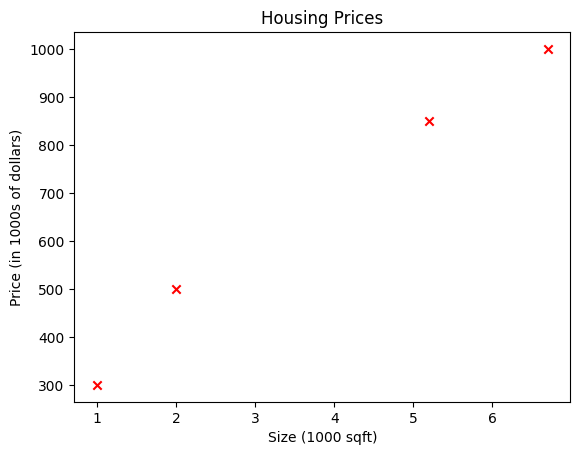

In [ ]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()


In [ ]:
#can update w,b later
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


In [ ]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """
    m =len(x)
    f_wb = np.zeros(m) #creates array filled with zeroes
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

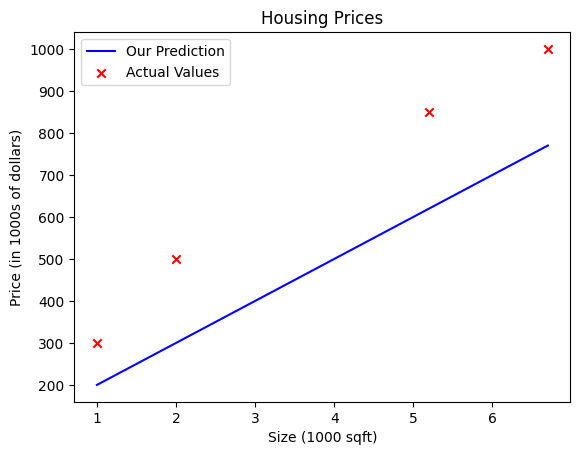

In [ ]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [ ]:
x_i = 4
cost_1200sqft = w * x_i + b

print(f"${cost_1200sqft:.0f} thousand dollars")

$500 thousand dollars


In [ ]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [ ]:
tot_cost = compute_cost(x_train, y_train,121, 206,)
print(f"total cost is:{tot_cost}")

total cost is:491.36625000000004


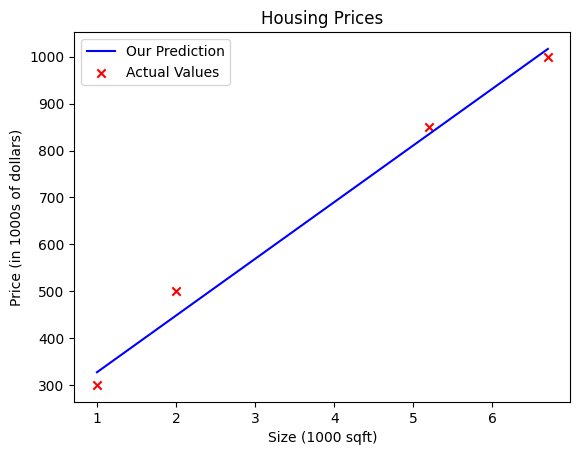

In [ ]:
w=121
b=206
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [ ]:
x_i = 4
cost_1200sqft = w * x_i + b

print(f"${cost_1200sqft} thousand dollars")


$690 thousand dollars


total cost is:491.36625000000004


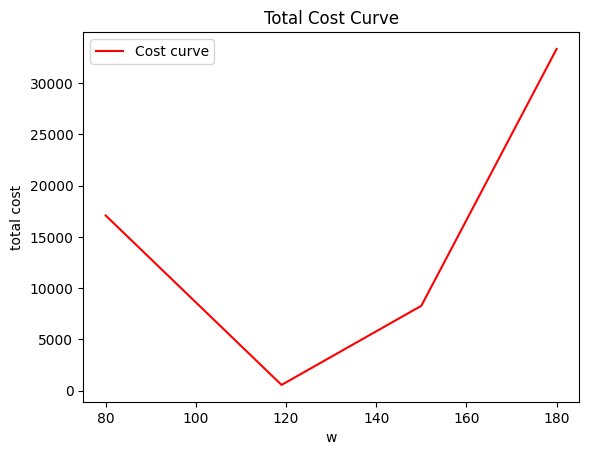

In [ ]:
tot_cost = compute_cost(x_train, y_train,w, b,)
print(f"total cost is:{tot_cost}")

m =len(x_train)
w_temps= np.array([80.0,119.0,150.0,180.0])
temp_cost = np.zeros(m) #creates array filled with zeroes
for i in range(m):
   wt = w_temps[i]
   temp_cost[i] = compute_cost(x_train, y_train,wt, b)

# Plot our parameter w and cost graph
plt.plot(w_temps, temp_cost, c='r',label='Cost curve')


# Set the title
plt.title("Total Cost Curve")
# Set the y-axis label
plt.ylabel('total cost')
# Set the x-axis label
plt.xlabel('w')
plt.legend()
plt.show()


In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = len(x)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
compute_gradient(x_train, y_train, w, b)

(-10.51749999999986, -5.774999999999977)

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

     Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    wglbl = w_in # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if (i%10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final:})")

Iteration    0: Cost 1.67e+05  dj_dw: -3.105e+03, dj_db: -6.625e+02   w:  3.105e+01, b: 6.62500e+00
Iteration   10: Cost 7.02e+03  dj_dw: -3.263e+02, dj_db: -1.153e+02   w:  1.415e+02, b: 3.34993e+01
Iteration   20: Cost 4.92e+03  dj_dw: -2.681e+01, dj_db: -5.512e+01   w:  1.525e+02, b: 4.07183e+01
Iteration   30: Cost 4.67e+03  dj_dw:  5.271e+00, dj_db: -4.750e+01   w:  1.529e+02, b: 4.57028e+01
Iteration   40: Cost 4.45e+03  dj_dw:  8.514e+00, dj_db: -4.557e+01   w:  1.521e+02, b: 5.03348e+01
Iteration   50: Cost 4.24e+03  dj_dw:  8.653e+00, dj_db: -4.429e+01   w:  1.513e+02, b: 5.48203e+01
Iteration   60: Cost 4.04e+03  dj_dw:  8.463e+00, dj_db: -4.311e+01   w:  1.504e+02, b: 5.91843e+01
Iteration   70: Cost 3.85e+03  dj_dw:  8.243e+00, dj_db: -4.197e+01   w:  1.496e+02, b: 6.34323e+01
Iteration   80: Cost 3.68e+03  dj_dw:  8.025e+00, dj_db: -4.086e+01   w:  1.488e+02, b: 6.75676e+01
Iteration   90: Cost 3.51e+03  dj_dw:  7.812e+00, dj_db: -3.977e+01   w:  1.480e+02, b: 7.15934e+01


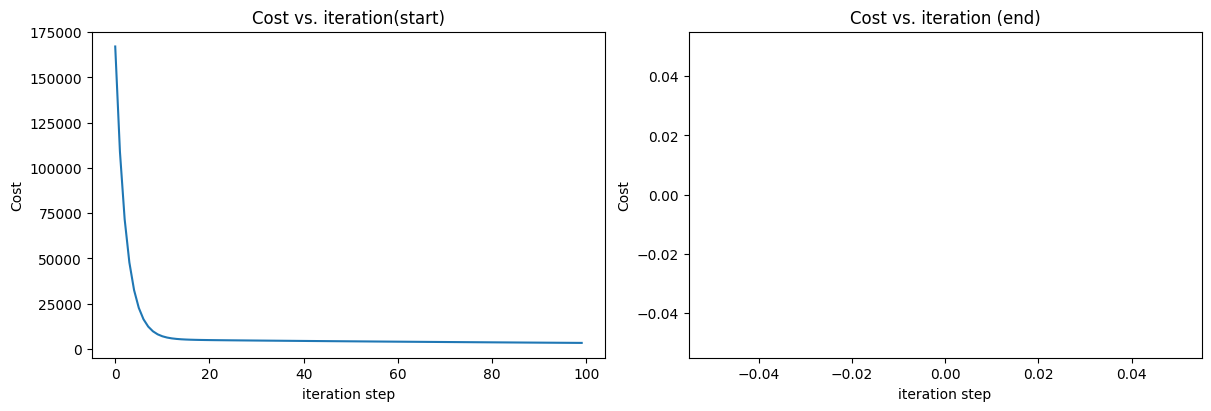

In [ ]:
#plotting cost vs iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()


In [ ]:
#predicting more prices from the model we have
print(f"4000 sqft house prediction {w_final*4.0 + b_final:0.1f} Thousand dollars")
print(f"2500 sqft house prediction {w_final*2.5 + b_final:0.1f} Thousand dollars")
print(f"4500 sqft house prediction {w_final*4.5 + b_final:0.1f} Thousand dollars")

4000 sqft house prediction 692.5 Thousand dollars
2500 sqft house prediction 510.2 Thousand dollars
4500 sqft house prediction 753.2 Thousand dollars
